Prerequisites:
1. Run the command pip install --upgrade google-api-python-client
2. Visit https://developers.google.com/youtube/v3/docs/channels/list
3. Select list to see the customizable code which is being used as a part of the function developed below

In [ ]:
import pandas as pd

# Here are the top youtube channels that I referred to learn data science from scratch. Hence, I'm scrapping their respective channels to get some insights. Following are the channels in order.


1.   Krish Naik  
2.   3blue1brown
3.   Joma Tech
4.   CS Dojo
5.   Sentdex
6.   Siraj Raval
7.   Code Basics
8.   Analytics Vidya
9.   FreeCodecamp
10.  Simplilearn
11.  Edureka
12.  GreatLearning
13.  Statquest![krishnbaik.png](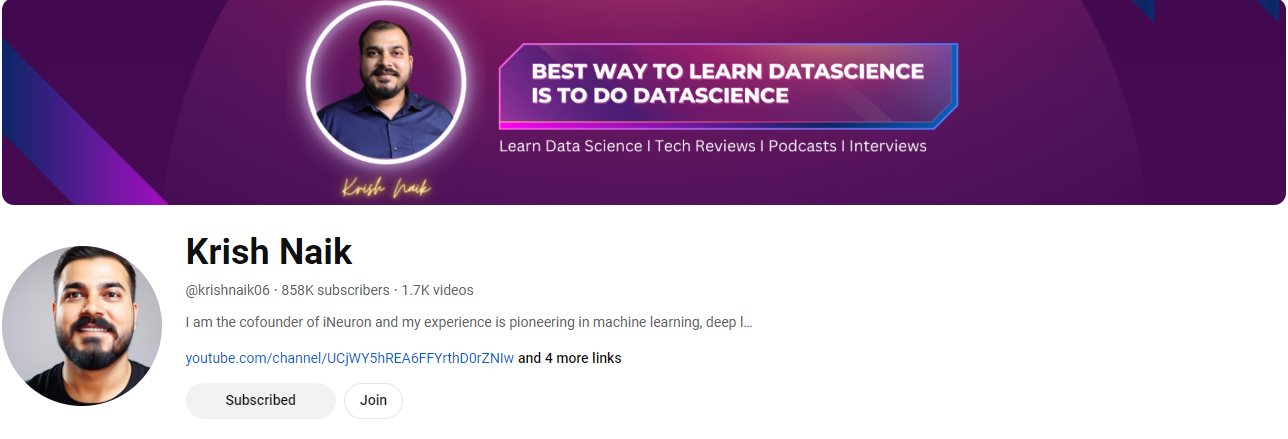![formatJson.png](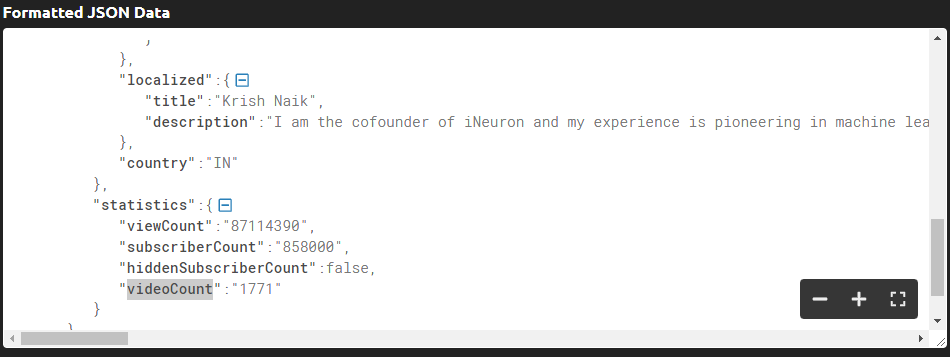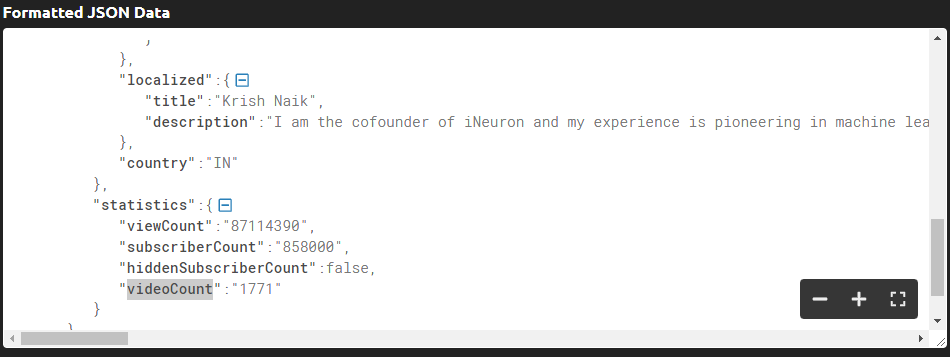))

In [ ]:
channel_ids = ['UCNU_lfiiWBdtULKOw6X0Dig', 'UCYO_jab_esuFRV4b17AJtAw', 'UCV0qA-eDDICsRR9rPcnG7tw', 'UCxX9wt5FWQUAAz4UrysqK9A', 'UCfzlCWGWYyIQ0aLC5w48gBQ', 'UCWN3xxRkmTPmbKwht9FuE5A', 'UCh9nVJoWXmFb7sLApWGcLPQ', 'UCH6gDteHtH4hg3o2343iObA', 'UC8butISFwT-Wl7EV0hUK0BQ', 'UCsvqVGtbbyHaMoevxPAq9Fg', 'UCkw4JCwteGrDHIsyIIKo4tQ', 'UCObs0kLIrDjX2LLSybqNaEA', 'UCtYLUTtgS3k1Fg4y5tAhLbw']

How to get the channel ID?
1. Go to the home page of the youtube channel that you are interested in
2. From the URL, copy the ID that comes after @
3. Paste that in https://www.streamweasels.com/tools/youtube-channel-id-and-user-id-convertor/
4. There you go, you got your favorite channel's channel ID



---



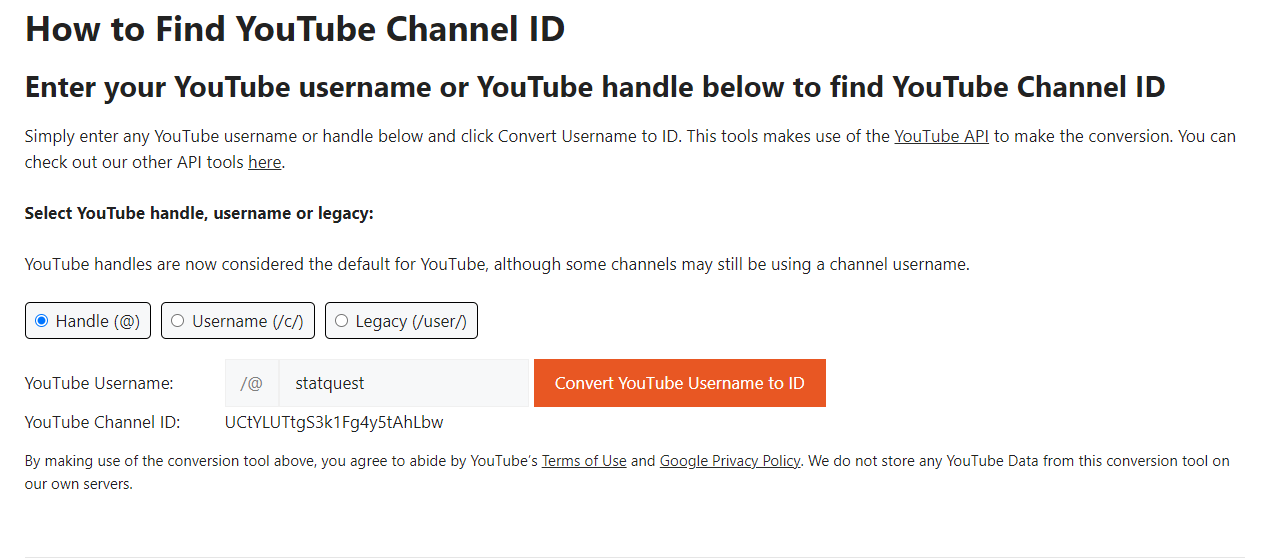


In [ ]:
channel_id_str = ','.join(channel_ids) #converting into string with comma as a delimitter

In [ ]:

import googleapiclient.discovery #library needed to access google api


In [ ]:
def youtube_scrapper(channel_id_str, channel_ids):
  final_data = []
  request = youtube.channels().list(
        part="snippet,statistics",
        id=channel_id_str,
    )
  response = request.execute()

  for i in range(0, len(channel_ids)):
    info = extracted_data = dict(channel_name = response['items'][i]['snippet']['title'], channel_id = response['items'][i]['snippet']['customUrl'] , country = response['items'][i]['snippet']['country'] , count_view = response['items'][i]['statistics']['viewCount'] , subscribers = response['items'][i]['statistics']['subscriberCount'] , no_of_videos = response['items'][i]['statistics']['videoCount']  )
    final_data.append(info)


  return final_data

Basically response is the variable which will have the raw json format details of the requested youtube channel. It will be a bit messy. Follow the steps given below.
1. Copy the response json
2. Paste it in https://jsonformatter.curiousconcept.com/#
3. You will get clear view of what lies under which tag and which subtags
4. Then choose the elements as you needed

Example: I needed to country of each youtube channel. Country lies under 'snippet' which lies under 'items' hence we use, country = response['items'][i]['snippet']['country']



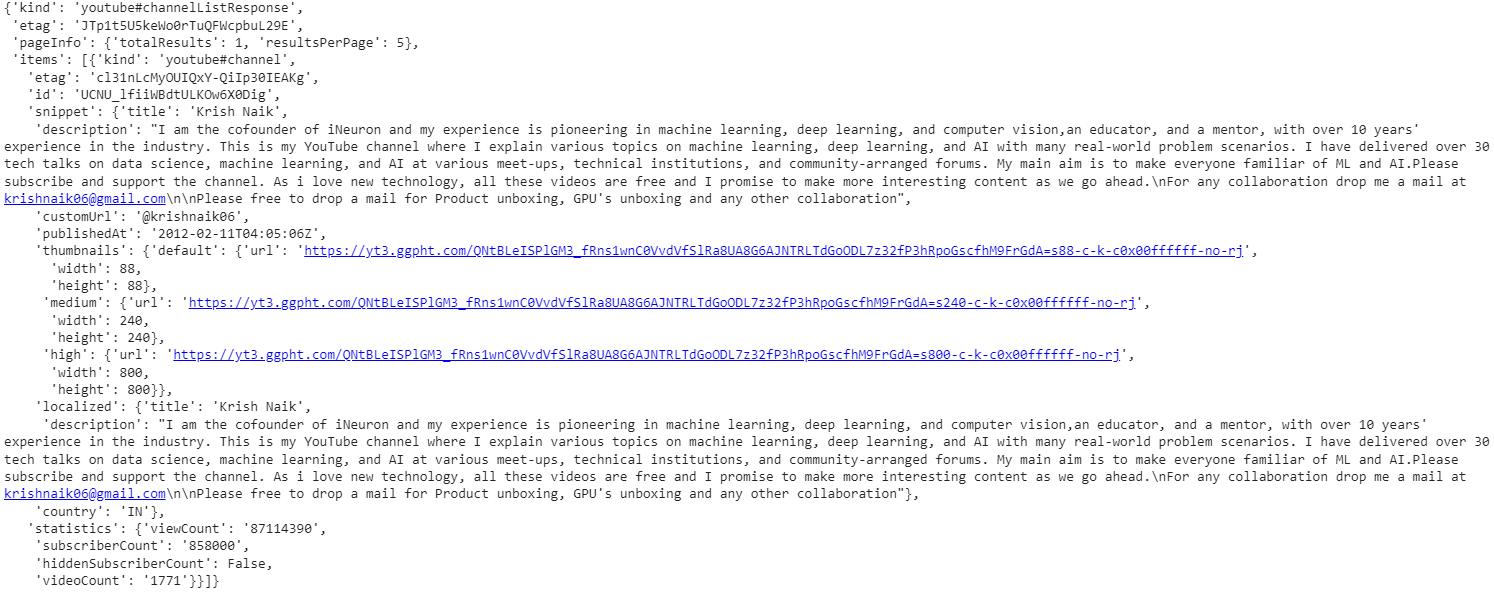

In [ ]:
df =  youtube_scrapper(channel_id_str, channel_ids)
youtube_df = pd.DataFrame(df)



In [ ]:
youtube_df

,channel_name,channel_id,country,count_view,subscribers,no_of_videos
0,StatQuest with Josh Starmer,@statquest,US,57940990,1060000,266
1,Analytics Vidhya,@analyticsvidhya,IN,2061695,49200,827
2,Joma Tech,@jomakaze,US,179069614,2270000,98
3,freeCodeCamp.org,@freecodecamp,US,644139582,8860000,1562
4,edureka!,@edurekain,IN,406093429,3910000,10624
5,CS Dojo,@csdojo,CA,80226413,1920000,104
6,Krish Naik,@krishnaik06,IN,87114390,858000,1771
7,sentdex,@sentdex,US,112935262,1280000,1251
8,Siraj Raval,@sirajraval,US,50048246,761000,465
9,Great Learning,@greatlearning,IN,63248509,811000,1862


from matplotlib import pyplot as plt
import seaborn as sns
youtube_df.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
response

{'kind': 'youtube#channelListResponse',
 'etag': 'JTp1t5U5keWo0rTuQFWcpbuL29E',
 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5},
 'items': [{'kind': 'youtube#channel',
   'etag': 'cl31nLcMyOUIQxY-QiIp30IEAKg',
   'id': 'UCNU_lfiiWBdtULKOw6X0Dig',
   'snippet': {'title': 'Krish Naik',
    'description': "I am the cofounder of iNeuron and my experience is pioneering in machine learning, deep learning, and computer vision,an educator, and a mentor, with over 10 years' experience in the industry. This is my YouTube channel where I explain various topics on machine learning, deep learning, and AI with many real-world problem scenarios. I have delivered over 30 tech talks on data science, machine learning, and AI at various meet-ups, technical institutions, and community-arranged forums. My main aim is to make everyone familiar of ML and AI.Please subscribe and support the channel. As i love new technology, all these videos are free and I promise to make more interesting content as we 